In [26]:
import os
import numpy as np

In [27]:
import matplotlib.pyplot as plt
import matplotlib.image as mpig
import numpy as np
import cv2

In [28]:
!pip install opencv-python

In [29]:
car1 = mpig.imread('car.jpg')

In [30]:
car1.shape

(540, 960, 3)

In [31]:
type(car1)

numpy.ndarray

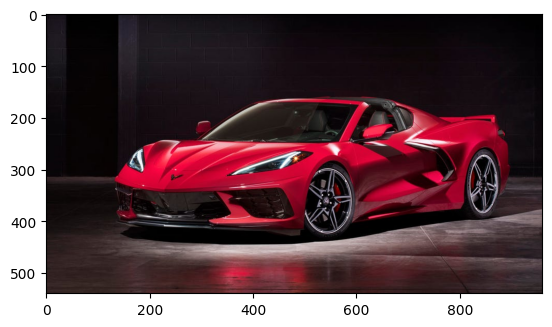

In [32]:
plt.imshow(car1)

In [33]:
car1_cv2 = cv2.imread('car.jpg')

In [34]:
cv2.imshow("image",car1_cv2)
cv2.waitKey(0)
cv2.destroyAllWindows()

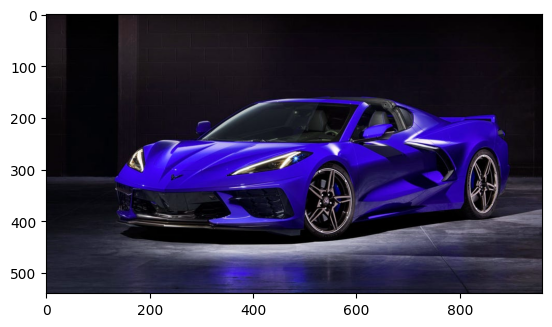

In [35]:
plt.imshow(car1_cv2)
#cv2 reads images as BGR format but in matplotlib it reads as RGB 

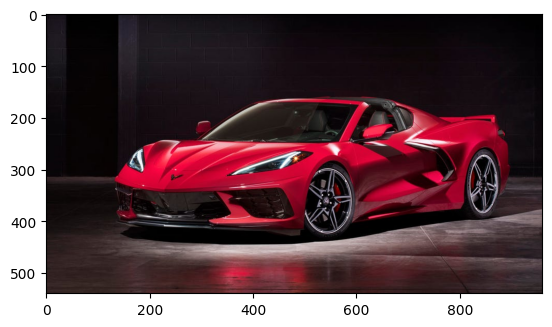

In [36]:
car1_cv2 = cv2.cvtColor(car1_cv2,cv2.COLOR_BGR2RGB)
plt.imshow(car1_cv2)

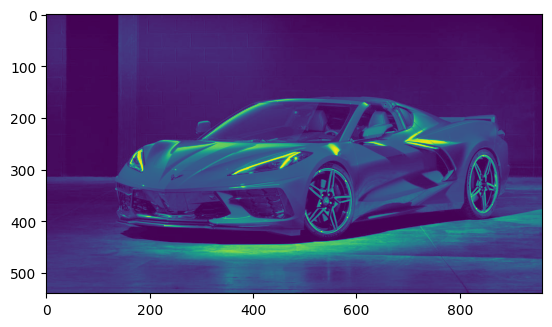

In [37]:
car1_cv2_gray = cv2.cvtColor(car1_cv2,cv2.COLOR_RGB2GRAY)
plt.imshow(car1_cv2_gray)

In [38]:
car1_cv2_gray.shape

(540, 960)

In [39]:
#Understanding the composition of color images 


In [40]:
def visualize_RGB_channel(imgArray=None,figsize=(10,7)):
    #splitting the RGB components 
    B,G,R = cv2.split(imgArray)
    # create zero matrix of shape of image 
    Z = np.zeros(B.shape,dtype=B.dtype)
    #intialize the subplots
    fig,ax = plt.subplots(2,2,figsize=figsize)
    # plotting the actual image and RGB images
    [axi.set_axis_off() for axi in ax.ravel()]
    ax[0,0].set_title("Original image")
    ax[0,0].imshow(cv2.merge((R,G,B)))
    
    ax[0,1].set_title("Red channel image")
    ax[0,1].imshow(cv2.merge((R,Z,Z)))
    
    ax[1,0].set_title("Greeen channel image")
    ax[1,0].imshow(cv2.merge((Z,G,Z)))
    
    ax[1,1].set_title("Blue channel image")
    ax[1,1].imshow(cv2.merge((Z,Z,B)))
    

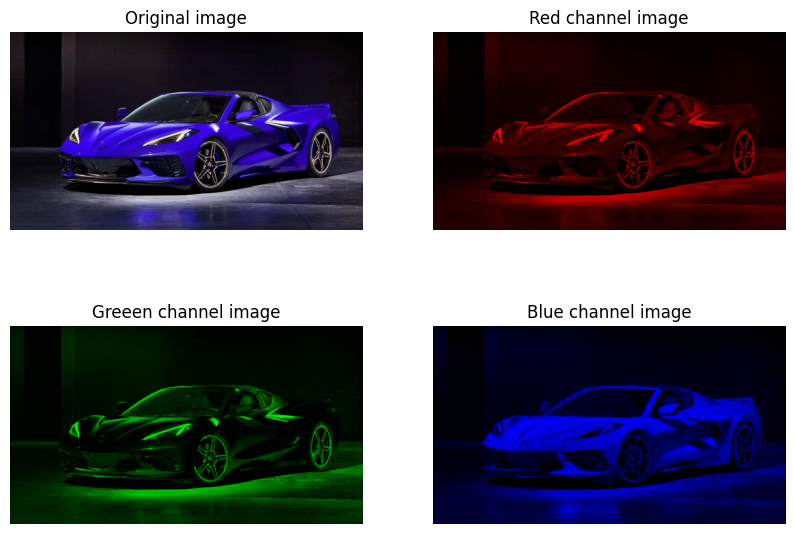

In [41]:
visualize_RGB_channel(imgArray=car1_cv2)

In [42]:
random_colored_img = np.random.randint(0,255,(6,6,3))


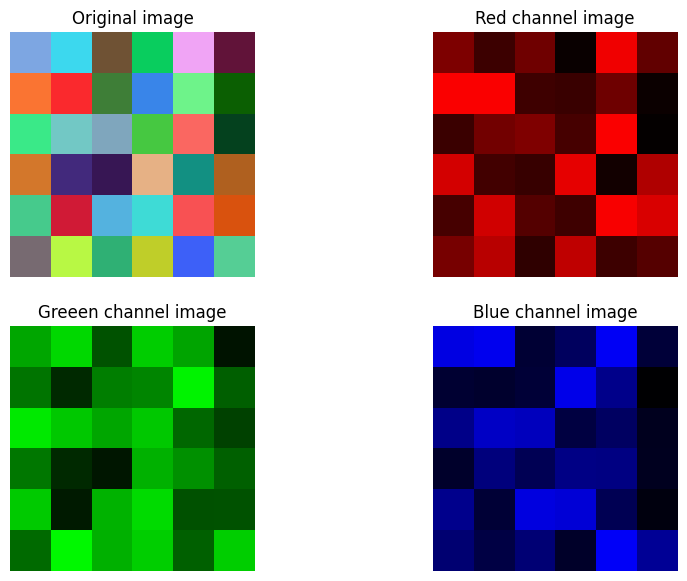

In [43]:
visualize_RGB_channel(imgArray=random_colored_img)

In [46]:
sobel =np.array([[1,0,-1],[2,0,-2],[1,0,-1]])
print("highlighting vertical edges:\n",sobel)

highlighting vertical edges:
 [[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]


In [48]:
sobel_h = sobel.T
print("highlighting vertical edges:\n",sobel_h)

highlighting vertical edges:
 [[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


In [67]:
example1 = np.random.randint(0,255,(6,6))*np.random.randn(6,6)

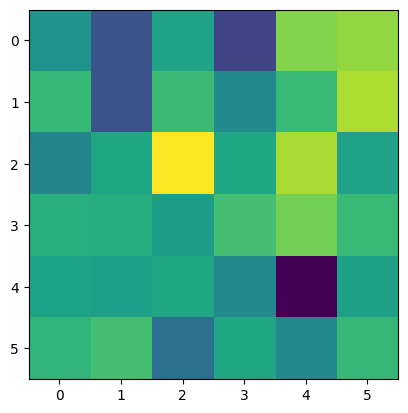

In [68]:
plt.imshow(example1)

In [61]:
def simple_convultion(imgfilter=None,picture=None):
    #extract the shape of the image
    p_row,p_col = picture.shape
    k = imgfilter.shape[0]
    temp = list()
    stride = 1
    #resultant image size 
    final_rows = int((p_row-k)/(stride) + 1)
    final_cols = int((p_col-k)/stride + 1)
    #take a vertical down stride across rows 
    
    for v_str in range(final_rows):
        #take a horizontal down stride across cols by cols 
        for h_str in range(final_cols):
            target_area_of_pic = picture[v_str:v_str+k,h_str:h_str+k]
            z = sum(sum(imgfilter*target_area_of_pic))
            temp.append(z)
    resultant_image = np.array(temp).reshape(final_rows,final_cols)
    return resultant_image


In [69]:
result = simple_convultion(imgfilter=sobel,picture=car1_cv2_gray)

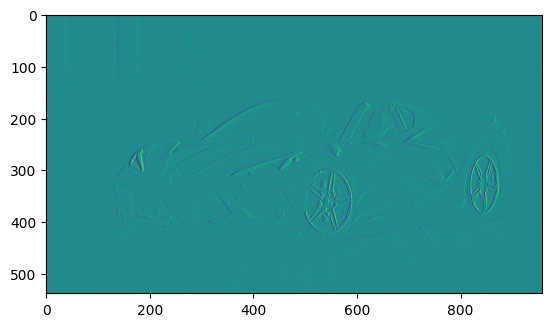

In [70]:
plt.imshow(result)

In [71]:
result = simple_convultion(imgfilter=sobel.T,picture=car1_cv2_gray)

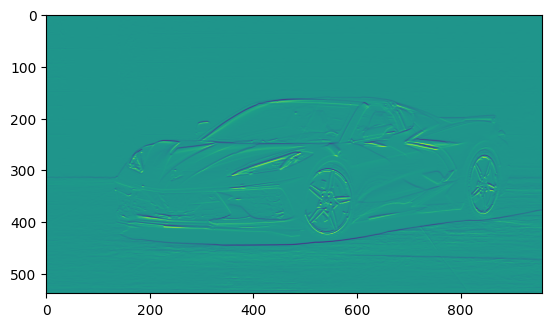

In [72]:
plt.imshow(result)